In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None
import inspect
from functools import partial

In [2]:
out=pt.import_excel('Python_Liq_Feldspar.xlsx', sheet_name="TwoFeldspar")
# All the outputs are stored in a dictioary "out" which searches for all possible minerals (e.g., ol, liq, cpx, plag, amp). 
#The ones you don't have will just be filled with zeros. Then, subsample the ones you want
my_input=out['my_input']
myPlags1=out['Plags']
myAlks1=out['Kspars']
myLiquids1=out['Liqs']

## Testing activity calculations

In [3]:
cat_plag = pt.calculate_cat_fractions_plagioclase(plag_comps=myPlags1)
cat_kspar = pt.calculate_cat_fractions_kspar(kspar_comps=myAlks1)
combo_fspars = pd.concat([cat_plag, cat_kspar], axis=1)
func=pt.calculate_fspar_activity_components
combo_fspars['T']=my_input['Temp_for_activity']
combo_fspars['P']=10*my_input['P_GPa']
kwargs = {name: combo_fspars[name] for name, p in inspect.signature(func).parameters.items() if p.kind == inspect.Parameter.KEYWORD_ONLY}
Eq_Test=func(**kwargs)
Eq_Test

,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar
0,-0.082798,0.218395,0.320775,0.581398,0.920855,1.133359,0.363003,1.003652,0.812583
1,0.328256,-0.073049,-0.094602,0.659264,0.800349,0.595443,0.732313,0.472093,0.690045
2,-0.031470,0.045680,-0.009054,0.602566,0.987446,0.735710,0.556886,1.018916,0.744764
3,0.081879,0.306270,0.103351,0.589691,0.924747,0.989951,0.283421,0.842868,0.886600
4,0.043670,0.191625,-0.028137,0.558950,0.908526,0.799582,0.367325,0.864856,0.827719
5,-0.573281,0.101061,0.127880,0.640463,1.080939,0.900160,0.539402,1.654221,0.772281
6,-0.546644,0.139836,0.106180,0.624549,1.092371,0.895181,0.484713,1.639015,0.789001
7,-0.517488,0.153764,0.180931,0.619675,1.126605,0.987312,0.465911,1.644093,0.806381
8,-0.202514,0.058589,0.013391,0.719511,0.973308,0.784932,0.660921,1.175822,0.771541
9,-0.168487,0.031794,-0.047571,0.765605,0.787360,0.693718,0.733811,0.955846,0.741290


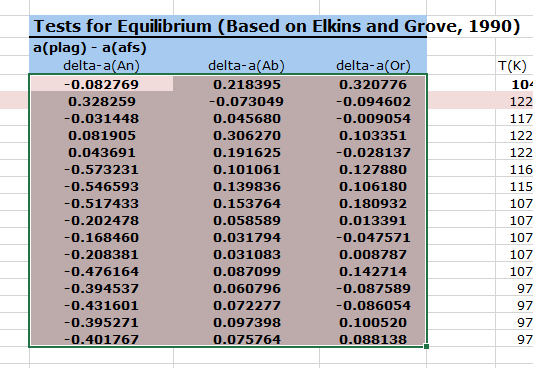

## Global Two feldspar thermometer from supporting spreadsheet of Putirka (2008)

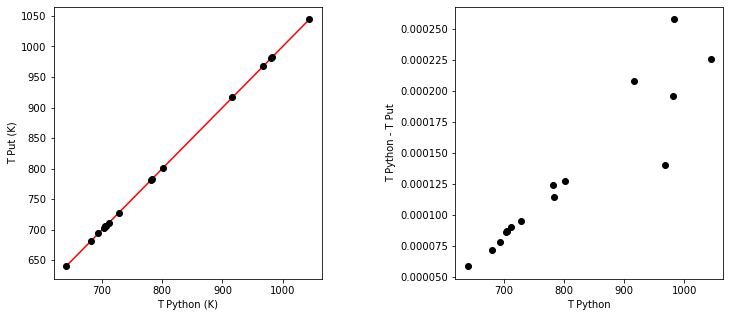

In [4]:
# Discrepencies likely due to rounded molar masses
T_Put=my_input['FixedP_T_Put2008_Global'] 
T_py=pt.calculate_plag_kspar_temp(plag_comps=myPlags1, kspar_comps=myAlks1, equationT="T_Put_Global_2Fspar", P=10*my_input['P_GPa'])-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

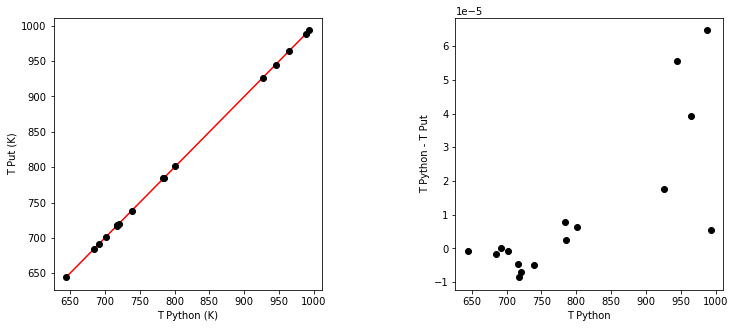

In [5]:
# Discrepencies likely due to rounded molar masses
T_Put=my_input['FixedP_T_Put2008_Eq27b'] 
T_py=pt.calculate_plag_kspar_temp(plag_comps=myPlags1, kspar_comps=myAlks1, equationT="T_Put2008_eq27b", P=10*my_input['P_GPa'])-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

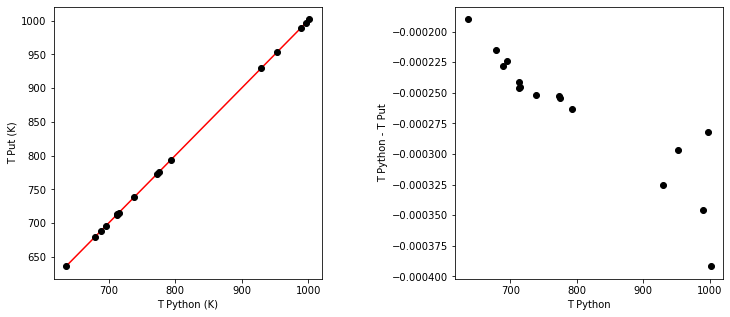

In [6]:
# Discrepencies likely due to rounded molar masses
T_Put=my_input['FixedP_T_Put2008_Eq27a'] 
T_py=pt.calculate_plag_kspar_temp(plag_comps=myPlags1, kspar_comps=myAlks1, equationT="T_Put2008_eq27a", P=10*my_input['P_GPa'])-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)